In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import depletion_analysis
from scipy.optimize import curve_fit
import scienceplots
import PNAS_data
import uncertainties as unc
from uncertainties import unumpy as unp
plt.style.use('science')

theoretical calculations

In [30]:
# constants
eps = 8.8541878188 * 10**(-12) * 81 # vacuum * water relative permittivity
Na = 6.02214076 * 10**(23) # avogadro number
qe = 1.60217663 * 10**(-19) # elementary charge of electrion in Culomb
kb = 1.380649 * 10**(-23) # boltzman constant
R =  8.31446261815324 #
T = 298.15

Rg_ssDNA = 0.55 # radius of ssDNA

#experimental data
c0 = 35 # concentration of Na+ in mmol which is equal to mol/m^3
zi = 13 # charge of the ssDNA 13bp
a = 0.0754/0.1754 * 4 + 0.0246/0.1754 # the anions part of the ionic strength HPO42- and H2PO4-
Km = 0.14 # complexation constant of the PEG - Na complexation

# calculated data

alpha = np.sqrt((eps * kb * T)/(2 * Na * qe**2))

Zi = zi * qe/(4 * np.pi * eps)


def calc_lambda():
    
    licznik = Na * zi * qe * Zi * np.sqrt(c0)
    mianownik = 3 * np.sqrt(6) * (3*a + 2)**(3/2) * np.e * alpha

    return licznik/mianownik
    
lambd = calc_lambda()

theory_a2 = -(4*a + 2)*lambd/(R*T) * Km**2

theory_a2

-0.03142361402688977

In [31]:
theory_a1 = 2 * (5 * a + 3) * lambd /(R * T) * Km
theory_a1

0.5849154400545907

In [32]:
obj = depletion_analysis.Depletion()

In [33]:
obj.data

,peg,molar mas,mas concentration,concentration [M],c*,monomers number,density,Rg [nm],Rh [nm],K hybr,K hybr error,K complex,K complex error,G
0,EG,62.07,2.5,0.443048,29.191025,1.000000,1.1,0.238610,0.153145,4.410000e+09,7.999740e+08,0.330454,0.128626,-4.495104
1,EG,62.07,5.0,0.886096,29.191025,1.000000,1.1,0.238610,0.153145,2.130000e+09,3.239730e+08,0.330454,0.128626,-3.626623
2,EG,62.07,7.5,1.329145,29.191025,1.000000,1.1,0.238610,0.153145,3.990000e+09,4.831890e+08,0.330454,0.128626,-6.017520
3,EG,62.07,10.0,1.772193,29.191025,1.000000,1.1,0.238610,0.153145,1.460000e+09,1.388460e+08,0.330454,0.128626,-4.279480
4,EG,62.07,12.5,2.215241,29.191025,1.000000,1.1,0.238610,0.153145,3.740000e+09,1.320968e+09,0.330454,0.128626,-7.298589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,p-35K,35000.00,15.0,0.004714,0.00045,794.142565,1.1,9.585839,5.702048,3.320000e+10,1.295464e+10,0.115530,0.044041,-11.233227
104,p-35K,35000.00,20.0,0.006286,0.00045,794.142565,1.1,9.585839,5.702048,1.930000e+10,6.123890e+09,0.115530,0.044041,-10.635003
105,p-35K,35000.00,25.0,0.007857,0.00045,794.142565,1.1,9.585839,5.702048,1.280000e+10,5.127680e+09,0.115530,0.044041,-10.298095
106,p-35K,35000.00,30.0,0.009429,0.00045,794.142565,1.1,9.585839,5.702048,8.370000e+09,3.326238e+09,0.115530,0.044041,-9.871332


In [35]:
coeff = obj.polynomial_coeff
data_reduced = obj.data.drop_duplicates(subset=['monomers number', 'molar mas', 'Rg [nm]']).reset_index()
coeff['monomers number'] = data_reduced['monomers number']
coeff['molar mas'] = data_reduced['molar mas']
coeff['Rg'] = data_reduced['Rg [nm]']

In [36]:
coeff

,peg,a2,a1,a0,monomers number,molar mas,Rg
0,EG,-0.113214,-0.138902,22.170069,1.000000,62.07,0.238610
1,p-200,-1.669215,0.384996,22.855236,4.131215,200.00,0.471997
2,p-400,-6.384148,2.393173,22.754302,8.671510,400.00,0.707033
3,p-600,-17.298670,7.830515,21.662651,13.211805,600.00,0.895572
4,p-1K,-36.470656,6.194760,23.160032,22.292395,1000.00,1.206253
5,"p-1,5K",-101.552588,21.106263,22.671611,33.643133,1500.00,1.527917
6,p-3K,-71.369217,-13.556050,24.252131,67.695346,3000.00,2.288759
7,p-6K,-1453.237763,74.895880,23.115749,135.799773,6000.00,3.428472
8,p-12K,-4679.944869,132.353737,22.997414,272.008627,12000.00,5.135717
9,p-20K,-11890.669319,168.790414,23.362215,453.620431,20000.00,6.917337


In [37]:
y_a1 = coeff['a1'] - 4 * np.pi * Na * coeff['Rg'] * Rg_ssDNA**2 * 10**(-24) # the last multiplication is to changenm^3 to liters

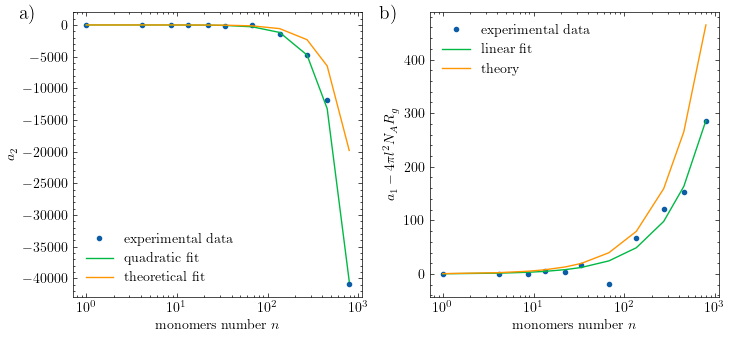

In [38]:
def quadratic(x, a):
    return a * x**2


def linear(x, a):
    return a * x

with plt.style.context(['science']):
    fig, axs = plt.subplots(1, 2, figsize=(7.5, 3.5))
    
    axs[0].plot(coeff['monomers number'], coeff['a2'], '.', label='experimental data')
    exp_a2 = curve_fit(quadratic, coeff['monomers number'], coeff['a2'])[0][0]
    axs[0].plot(coeff['monomers number'], exp_a2 * coeff['monomers number']**2, label='quadratic fit')
    axs[0].plot(coeff['monomers number'], theory_a2 * coeff['monomers number']**2, label='theoretical fit')
    axs[0].set_xlabel(r'monomers number $n$')
    axs[0].set_ylabel(r'$a_2$')
    axs[0].set_xscale('log')
    axs[0].legend()

    axs[1].plot(coeff['monomers number'], y_a1, '.', label='experimental data')
    exp_a1 = curve_fit(linear, coeff['monomers number'], y_a1)[0][0]
    axs[1].plot(coeff['monomers number'], exp_a1 * coeff['monomers number'], label='linear fit')
    axs[1].plot(coeff['monomers number'], theory_a1 * coeff['monomers number'], label='theory')
    axs[1].set_xlabel(r'monomers number $n$')
    axs[1].set_ylabel(r'$a_1 - 4 \pi l^2 N_A R_g$')
    axs[1].set_xscale('log')
    axs[1].legend()

    fig.text(0.05, 0.95, 'a)', fontsize=14, fontweight='bold', ha='center', va='center')
    fig.text(0.53, 0.95, 'b)', fontsize=14, fontweight='bold', ha='center', va='center')
    
    plt.tight_layout()

    plt.savefig('a1_a2_dependency.pdf', format='pdf', bbox_inches='tight')

In [39]:
results = pd.DataFrame({'a1': [exp_a1, theory_a1], 'a2': [exp_a2, theory_a2]}, index=['experimental', 'theory'])

results.to_csv('a1_a2.csv')

In [41]:
results

,a1,a2
experimental,0.360212,-0.064182
theory,0.584915,-0.031424


Taylor series approximation

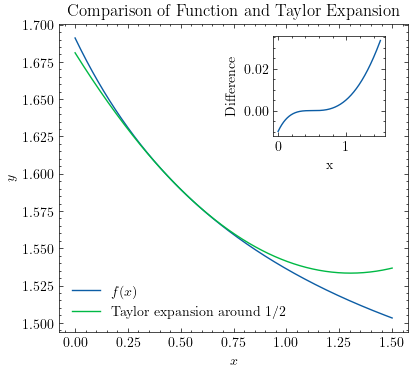

In [10]:
# Define the range for x
x = np.linspace(0, 1.5, 500)  # Ensure the domain of the function is valid

# Define the functions
y1 = np.sqrt(1 /(x + 1) + a)
# Taylor expansion around x = 1/2
sqrt_term = np.sqrt(2 / 3)
y2 =(4 * a + 2) / (3 * np.sqrt(3) * (3 * a + 2)**(3/2)) * x**2 - (2 * (5 * a + 3)) / (3 * np.sqrt(3) * (3 * a + 2)**(3/2)) * x + (54 * a**2 + 80 * a + 29) / (6 * np.sqrt(3) * (3 * a + 2)**(3/2))
difference = y2 - y1


with plt.style.context(['science']):

    fig, ax = plt.subplots(figsize = (4.5,4))
    
    ax.plot(x, y1, label=r'$f(x)$')
    ax.plot(x, y2, label='Taylor expansion around 1/2')
    
    ax.legend(loc='lower left')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_title('Comparison of Function and Taylor Expansion')


    # Create inset manually
    inset_ax = plt.axes([0.6, 0.6, 0.25, 0.25])  # [left, bottom, width, height]
    inset_ax.plot(x, difference)
    inset_ax.set_xlabel('x')
    inset_ax.set_ylabel('Difference')
    plt.savefig('function_taylor.pdf', format = 'pdf', dpi=600)

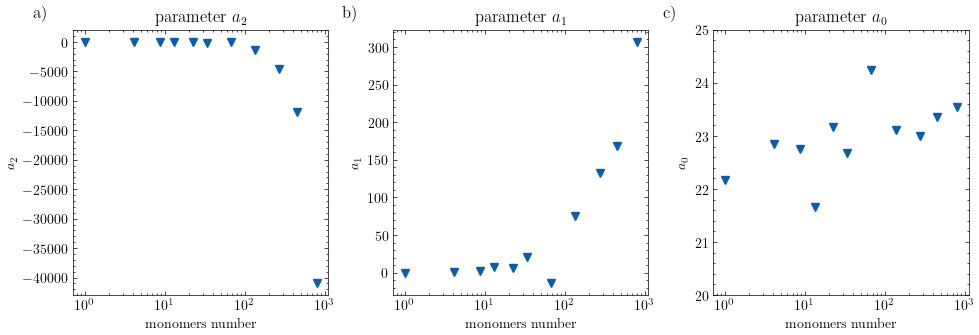

In [11]:
with plt.style.context(['science']):
    fig, axs = plt.subplots(1, 3, figsize=(10, 3.5))
    
    axs[0].plot(coeff['monomers number'], coeff['a2'], 'v')
    axs[0].set_xlabel('monomers number')
    axs[0].set_ylabel(r'$a_2$')
    axs[0].set_title(r'parameter $a_2$')
    axs[0].set_xscale('log')


    axs[1].plot(coeff['monomers number'], coeff['a1'], 'v')
    axs[1].set_xlabel('monomers number')
    axs[1].set_ylabel(r'$a_1$')
    axs[1].set_title(r'parameter $a_1$')
    axs[1].set_xscale('log')

    axs[2].plot(coeff['monomers number'], coeff['a0'], 'v')
    axs[2].set_xlabel('monomers number')
    axs[2].set_ylabel(r'$a_0$')
    axs[2].set_ylim(20,25)
    axs[2].set_title(r'parameter $a_0$')
    axs[2].set_xscale('log')


    fig.text(0.05, 0.95, 'a)', fontsize=12, fontweight='bold', ha='center', va='center')
    fig.text(0.36, 0.95, 'b)', fontsize=12, fontweight='bold', ha='center', va='center')
    fig.text(0.68, 0.95, 'c)', fontsize=12, fontweight='bold', ha='center', va='center')
    
    plt.tight_layout()

    plt.savefig('a1_a2_a0_dependency.pdf', format='pdf', bbox_inches='tight')

Estimating values from the PNAS paper

In [2]:
PNAS = PNAS_data.PNAS_data()

In [26]:
def plot_fit(probe):

    x = np.array(PNAS.get_probe(probe)['c [M]'], dtype=np.float64)
    #y, y_error = PNAS.get_float_uncertainty(unp.log(PNAS.get_probe(probe)['K [M]']))

    y, y_error = PNAS.get_float_uncertainty(1/PNAS.get_probe(probe)['K [M]'])

    

    with plt.style.context(['science']):

        plt.plot(x,y, '.')
    

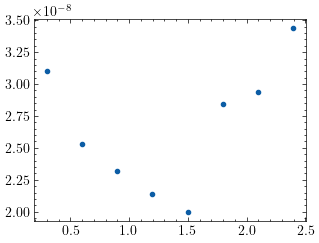

In [27]:
plot_fit('Triethylene glycol')

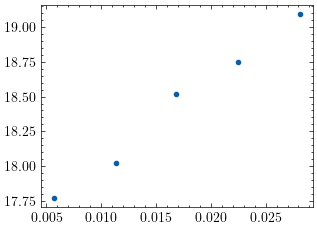

In [23]:
plot_fit('PEG 6000')

In [22]:
coeff = PNAS.coeff

In [23]:
coeff

,peg,a2,a1,a0
0,Ethylene glycol,-0.057416,0.443440,17.264778
1,Diethylene glycol,-0.117488,0.363916,17.358638
2,Triethylene glycol,-0.416552,1.061869,16.993958
3,PEG 200,-0.300799,0.886230,17.157242
4,PEG 400,-1.350031,2.197216,16.886796
5,PEG 1000,-5.402465,5.746480,17.447266
6,PEG 2050,33.233734,4.120859,17.456445
7,PEG 4600,180.611086,38.490130,17.494823
8,PEG 6000,-504.982523,77.456502,17.301372
9,PEG 35000,167454.830381,-306.272949,17.976320


In [15]:
coeff.loc['PEG 35000']

KeyError: 'PEG 35000'